<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 08</o>: <m>(__Num 4 ML__)</m>

> <c>Newton optimization</c> 
##### <m> Problem </m>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import minimize
%matplotlib inline

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o> Objective function and its gradient & Hessian </o>

In [2]:
def Func(x,y):
    return 100*(y-x**2)**2 + (1-x)**2

def GradFunc(x,y):
    return np.vstack((100*(-4*y*x + 4*x**3)+(-2+2*x),100*(2*y-2*x**2)))

def HessFunc(x,y):
    return np.vstack((np.hstack((100*(-4*y+12*x**2)+2,-400*x)),np.hstack((-400*x,200))))



def Liner(xc,xs):
    N = 10
    x = np.linspace(xc[0],xs[0],num=N)
    y = np.linspace(xc[1],xs[1],num=N)
    return x,y

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o> Newton optimization + Line Search </o>

In [3]:
def Newton(HessFunc,GradFunc,tol,init,Max_iter):
    x = init
    optimals = []
    optimals.append(x)
    for i in range(Max_iter):
        x = x - np.linalg.pinv(HessFunc(x[0],x[1])) @ GradFunc(x[0],x[1])
        optimals.append(x)
        if np.linalg.norm(GradFunc(x[0],x[1])) < tol:
            break
    else:
        print(f"The tolerance {tol:2.3e} is not reached in {Max_iter} iteration.")
    optimals = np.array(optimals).reshape(len(optimals),2)
    return x,optimals

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <c> Visualization of performance </c>

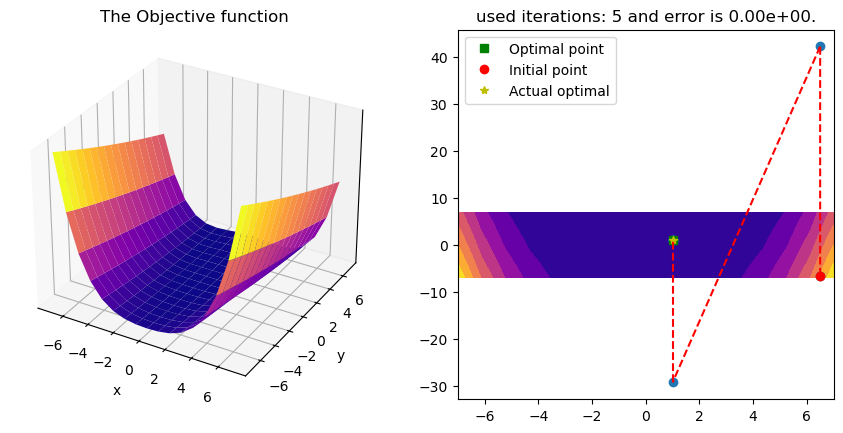

In [6]:
M = 17
X,Y = np.meshgrid(np.linspace(-7,7,num=M),np.linspace(-7,7,num=M))
Points = np.vstack((X.flatten(),Y.flatten())).T
init=np.array([6.5,-6.5]).reshape(-1,1)
F = Func(Points[:,0],Points[:,1])
G = GradFunc(Points[:,0],Points[:,1])
optimal,path=Newton(HessFunc=HessFunc,GradFunc=GradFunc,tol=1e-8,init=init,Max_iter=10)
error = np.linalg.norm(np.array([1,1]).reshape(-1,1)-path[-1],2)
fig = plt.figure(figsize=plt.figaspect(0.45))
ax = fig.add_subplot(1,2,1,projection = "3d")
ax.plot_surface(X,Y,F.reshape(X.shape),cmap='plasma')
# ax.view_init(elev=0,azim=90,roll=0)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zticks([])
ax.set_title("The Objective function")

ax2 = fig.add_subplot(1,2,2)
ax2.contourf(X,Y,F.reshape(X.shape),cmap='plasma')
ax2.plot(optimal[0],optimal[1],'gs',lw=3,label='Optimal point')
ax2.plot(init[0],init[1],'ro',lw=3,label="Initial point")
ax2.scatter(path[:,0],path[:,1])
ax2.plot(1,1,'y*',label="Actual optimal")
for i in range(0,path.shape[0]-1):
    s,t =Liner(list(path[i]),list(path[i+1]))
    ax2.plot(s,t,'r--')
ax2.set_title(f"used iterations: {path.shape[0]-1} and error is {error:2.2e}.")
ax2.legend()
plt.show()


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m> Bad Case of objective </m>

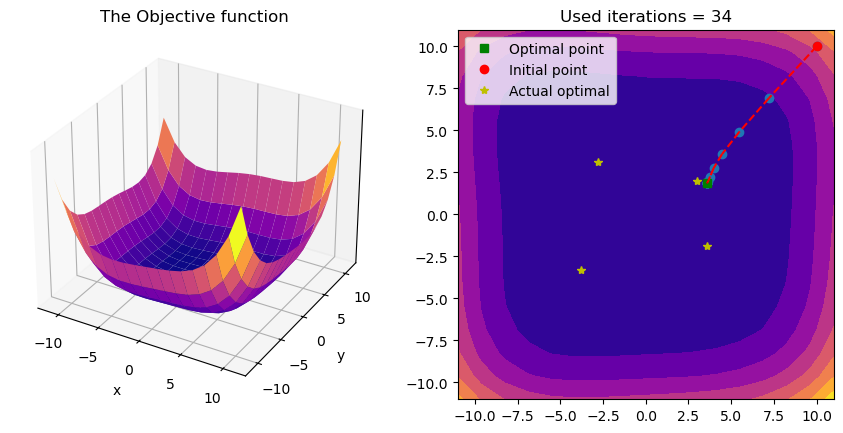

In [13]:
def Func2(x,y):
    return (x**2-y-11)**2 + (x+y**2-7)**2

def GradFunc2(x,y):
    return np.vstack(((4*x**3-4*x*y-42*x+2*y**2-14),4*y**3+4*x*y-26*y+22-2*x**2))

def HessFunc2(x,y):
    return np.vstack((np.hstack((4*(x**2-y-11)+8*x**2+2,4*y+4*x)),np.hstack((4*y+4*x,4*(x+y**2-7)+8*y**2+2))))


M = 17
X,Y = np.meshgrid(np.linspace(-11,11,num=M),np.linspace(-11,11,num=M))
Points = np.vstack((X.flatten(),Y.flatten())).T
init=np.array([10.0,10.0]).reshape(-1,1)
F = Func2(Points[:,0],Points[:,1])
G = GradFunc2(Points[:,0],Points[:,1])
optimal,path=Newton(HessFunc=HessFunc2,GradFunc=GradFunc2,tol=1e-3,init=init,Max_iter=500)
fig = plt.figure(figsize=plt.figaspect(0.45))
ax = fig.add_subplot(1,2,1,projection = "3d")
ax.plot_surface(X,Y,F.reshape(X.shape),cmap='plasma')
# ax.view_init(elev=0,azim=90,roll=0)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zticks([])
ax.set_title("The Objective function")

ax2 = fig.add_subplot(1,2,2)
ax2.contourf(X,Y,F.reshape(X.shape),cmap='plasma')
ax2.plot(optimal[0],optimal[1],'gs',lw=3,label='Optimal point')
ax2.plot(init[0],init[1],'ro',lw=3,label="Initial point")
ax2.scatter(path[:,0],path[:,1])
ax2.plot(3.0,2.0,'y*',label="Actual optimal")
ax2.plot(-2.805118,3.131312,'y*')
ax2.plot(-3.779310,-3.283186,'y*')
ax2.plot(3.584428,-1.848126,'y*')
ax2.set_title(f"Used iterations = {path.shape[0]-1}")
for i in range(0,path.shape[0]-1):
    s,t =Liner(list(path[i]),list(path[i+1]))
    ax2.plot(s,t,'r--')
ax2.legend()
plt.show()

In [16]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H
init = init.flatten()
resBFGS = minimize(rosen,init,method='BFGS',options={'gtol':1e-8,'disp':False})
resCG = minimize(rosen,init,jac=rosen_der,hess=rosen_hess,method='Newton-CG',options={'gtol':1e-8,'disp':False})
resNelMead = minimize(rosen,init,method='nelder-mead',options={'gtol':1e-8,'disp':False})
resTRCG = minimize(rosen,init,jac=rosen_der,hess=rosen_hess,method='trust-ncg',options={'gtol':1e-8,'disp':False})

/tmp/ipykernel_13270/170681445.py:27: OptimizeWarning: Unknown solver options: gtol
  resCG = minimize(rosen,init,jac=rosen_der,hess=rosen_hess,method='Newton-CG',options={'gtol':1e-8,'disp':False})
/tmp/ipykernel_13270/170681445.py:28: OptimizeWarning: Unknown solver options: gtol
  resNelMead = minimize(rosen,init,method='nelder-mead',options={'gtol':1e-8,'disp':False})


In [15]:
init

array([[10.],
       [10.]])

In [17]:
resCG

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.5508004454922845e-18
       x: [ 1.000e+00  1.000e+00]
     nit: 51
     jac: [ 4.097e-07 -2.057e-07]
    nfev: 83
    njev: 83
    nhev: 51

In [18]:
resNelMead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.550818625380142e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 129
          nfev: 235
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00]]), array([ 3.551e-10,  4.640e-10,  8.444e-10]))

In [19]:
resBFGS

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.4335485384403896e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 90
      jac: [ 7.487e-05 -3.624e-05]
 hess_inv: [[ 4.997e-01  9.994e-01]
            [ 9.994e-01  2.004e+00]]
     nfev: 459
     njev: 149

In [20]:
resTRCG

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.465190328815662e-30
       x: [ 1.000e+00  1.000e+00]
     nit: 43
     jac: [ 4.219e-14 -2.220e-14]
    nfev: 44
    njev: 40
    nhev: 39
    hess: [[ 8.020e+02 -4.000e+02]
           [-4.000e+02  2.000e+02]]